In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bisection(f, a, b, tol=1e-12, max_iter=100):
    if f(a)*f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    errors, roots = [], []
    for n in range(max_iter):
        c = (a + b) / 2
        roots.append(c)
        if abs(f(c)) < tol or (b - a)/2 < tol:
            break
        if f(a)*f(c) < 0:
            b = c
        else:
            a = c
        errors.append(abs(b - a))
    return np.array(roots), np.array(errors)

In [3]:
def newton(f, df, x0, tol=1e-12, max_iter=100):
    roots, errors = [x0], []
    for n in range(max_iter):
        x1 = x0 - f(x0)/df(x0)
        roots.append(x1)
        errors.append(abs(x1 - x0))
        if abs(x1 - x0) < tol:
            break
        x0 = x1
    return np.array(roots), np.array(errors)

In [4]:
f1  = lambda x: x**2 - 1
df1 = lambda x: 2*x

f2  = lambda x: (x - 1)**2
df2 = lambda x: 2*(x - 1)

f3  = lambda x: (x - 1)**3
df3 = lambda x: 3*(x - 1)**2

In [5]:
def plot_errors(errors_bis, errors_newton, title):
    plt.figure(figsize=(7,4))
    plt.semilogy(errors_bis, label="Bisection")
    plt.semilogy(errors_newton, label="Newton–Raphson")
    plt.xlabel("Iteration n")
    plt.ylabel("|xₙ − x̄| (log scale)")
    plt.title(title)
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()


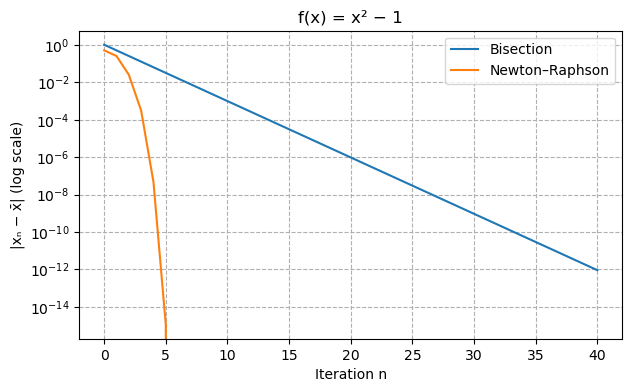

In [ ]:
root_true = 1.0

roots_bis, err_bis = bisection(f1, -1, 1)
roots_new, err_new = newton(f1, df1, 0.5)

plot_errors(abs(roots_bis - root_true), abs(roots_new - root_true),
            "f(x) = x² − 1")

Bisection has a linear trend while Newton-Raphson converges into few iterations

⚠️ Bisection not applicable for f(x) = (x−1)² since f(x) ≥ 0 everywhere.


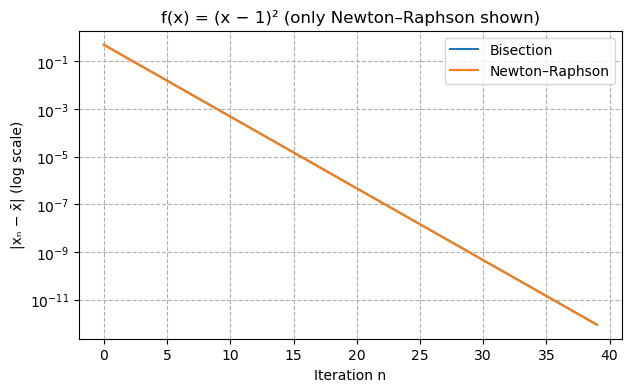

In [14]:
print("⚠️ Bisection not applicable for f(x) = (x−1)² since f(x) ≥ 0 everywhere.")
roots_bis, err_bis = np.array([]), np.array([])
roots_new, err_new = newton(f2, df2, 0.5)

plot_errors(abs(roots_new - 1.0), abs(roots_new - 1.0),
            "f(x) = (x − 1)² (only Newton–Raphson shown)")

The requirements of opposite sign is not respected since it is impossible to find two points a, b such that $f(a)*f(b) < 0$

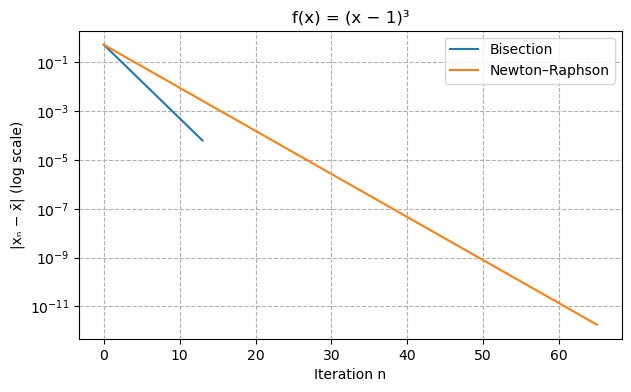

In [13]:
root_true = 1.0

roots_bis, err_bis = bisection(lambda x: f3(x) - 1e-12, -1, 2)
roots_new, err_new = newton(f3, df3, 0.5)

plot_errors(abs(roots_bis - root_true), abs(roots_new - root_true),
            "f(x) = (x − 1)³")

Close to the root, the function $f'(x) = 3*(x-1)^2$ goes to $0$, therefore the fraction $f(x)/f'(x)$ is small